Connected to Python 3.12.1

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from scipy.stats import pearsonr, ttest_rel
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel


In [2]:
# === Section 1: Load and Explore the Dataset ===
# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=';')
print("Data Overview:")
data.head()

Data Overview:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# Check for missing values
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [4]:
# Display column data types for clarity
print("\nData Types:")
print(data.dtypes)


Data Types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [5]:
# === Section 2: Categorize Grades and Visualize ===
# Categorize grades into Low, Medium, High
bins = [-1, 9, 14, 20]
labels = ['Low', 'Medium', 'High']
data['Grade_Category'] = pd.cut(data['G3'], bins=bins, labels=labels)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade_Category
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Medium
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,High
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Medium


In [6]:
# Display the distribution of grade categories
print("\nGrade Category Distribution:")
print(data['Grade_Category'].value_counts())


Grade Category Distribution:
Grade_Category
Medium    192
Low       130
High       73
Name: count, dtype: int64


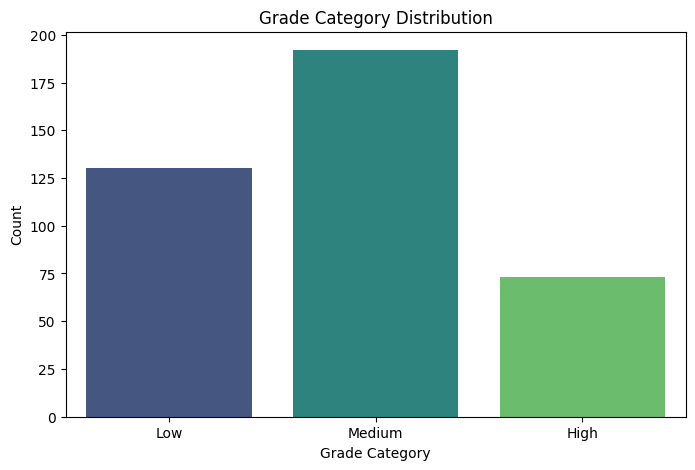

In [7]:
# Visualization: Grade category distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Grade_Category', palette='viridis', hue='Grade_Category', dodge=False, legend=False)
plt.title("Grade Category Distribution")
plt.xlabel("Grade Category")
plt.ylabel("Count")
plt.show()

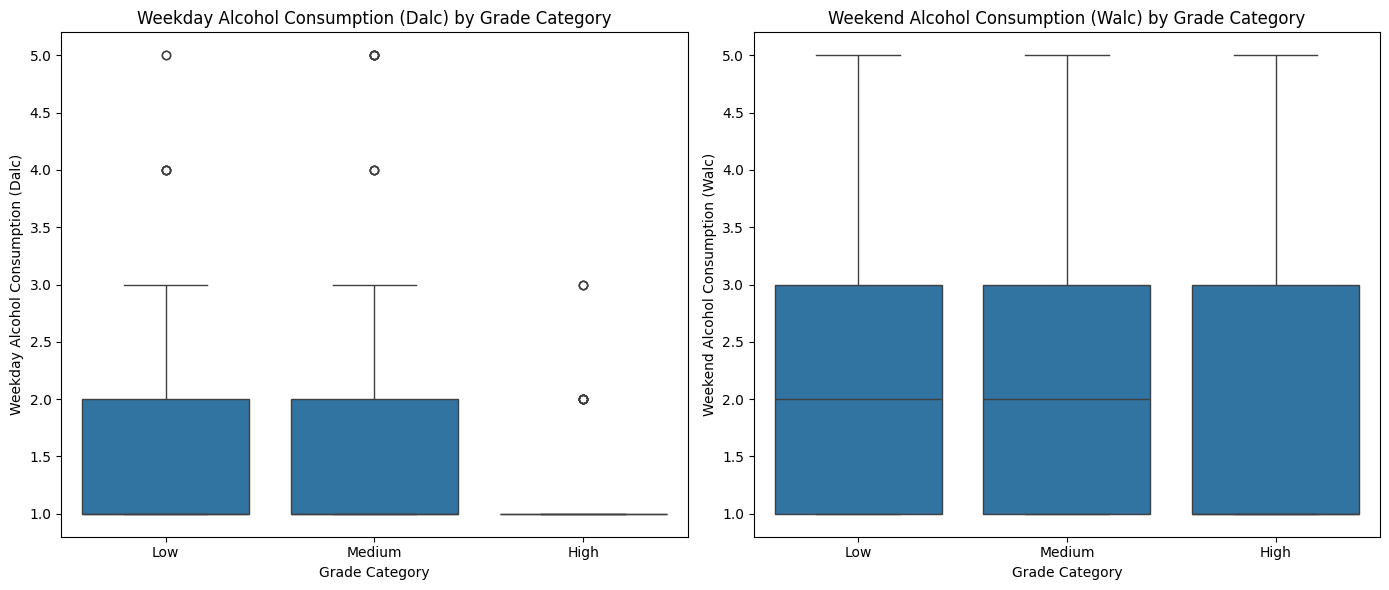

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the plots to resolve future warnings
plt.figure(figsize=(14, 6))

# Boxplot for weekday alcohol consumption (Dalc) vs. grade category
plt.subplot(1, 2, 1)
sns.boxplot(x='Grade_Category', y='Dalc', data=data)
plt.title("Weekday Alcohol Consumption (Dalc) by Grade Category")
plt.xlabel("Grade Category")
plt.ylabel("Weekday Alcohol Consumption (Dalc)")

# Boxplot for weekend alcohol consumption (Walc) vs. grade category
plt.subplot(1, 2, 2)
sns.boxplot(x='Grade_Category', y='Walc', data=data)
plt.title("Weekend Alcohol Consumption (Walc) by Grade Category")
plt.xlabel("Grade Category")
plt.ylabel("Weekend Alcohol Consumption (Walc)")

plt.tight_layout()
plt.show()


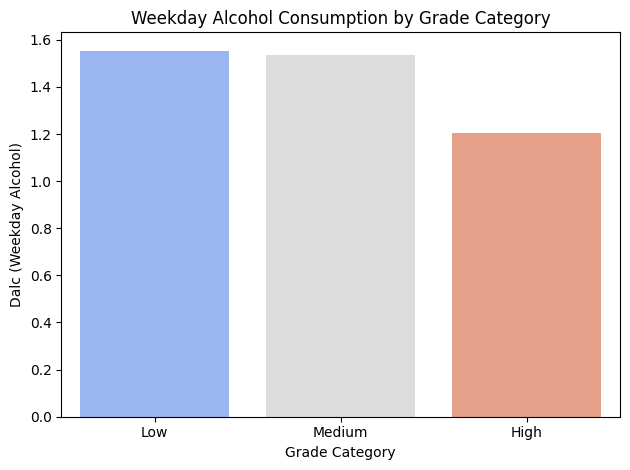

In [9]:
# === Section 3: Alcohol Consumption Analysis ===
# Weekday alcohol consumption by grade category
sns.barplot(
    x='Grade_Category', 
    y='Dalc', 
    data=data, 
    errorbar=None,  # Replace `ci=None` with `errorbar=None` to address the first warning
    hue='Grade_Category',  # Assign the `x` variable to `hue`
    palette="coolwarm", 
    dodge=False,  # Prevent splitting of bars
    legend=False  # Remove redundant legend
)
plt.title("Weekday Alcohol Consumption by Grade Category")
plt.ylabel("Dalc (Weekday Alcohol)")
plt.xlabel("Grade Category")
plt.tight_layout()
plt.show()

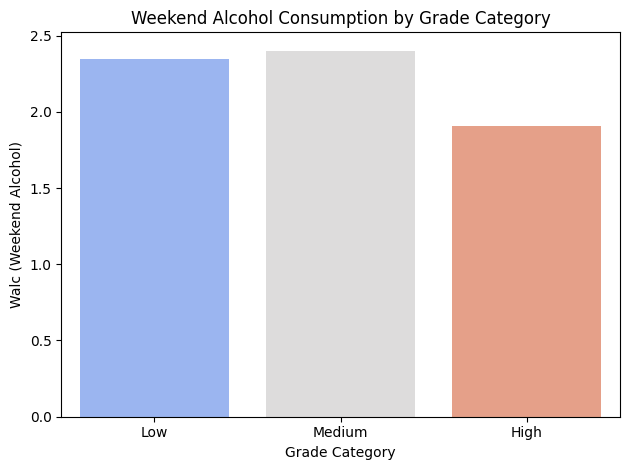

In [10]:
# Weekend alcohol consumption by grade category
# Barplot for weekend alcohol consumption by grade category
sns.barplot(
    x='Grade_Category', 
    y='Walc', 
    data=data, 
    errorbar=None,  # Replace `ci=None` with `errorbar=None`
    hue='Grade_Category',  # Assign the `x` variable to `hue`
    palette="coolwarm", 
    dodge=False,  # Prevent splitting of bars
    legend=False  # Remove redundant legend
)
plt.title("Weekend Alcohol Consumption by Grade Category")
plt.ylabel("Walc (Weekend Alcohol)")
plt.xlabel("Grade Category")
plt.tight_layout()
plt.show()

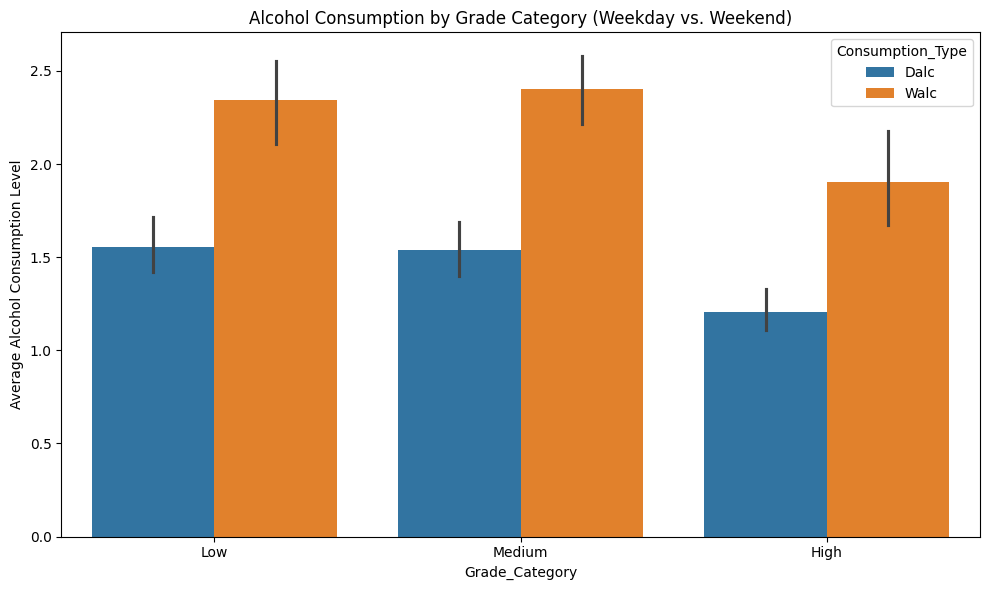

In [11]:
# Combined bar plot for weekday and weekend alcohol consumption
melted_data = data.melt(id_vars="Grade_Category", 
                        value_vars=["Dalc", "Walc"], 
                        var_name="Consumption_Type", 
                        value_name="Alcohol_Consumption")
plt.figure(figsize=(10, 6))
sns.barplot(x="Grade_Category", y="Alcohol_Consumption", hue="Consumption_Type", data=melted_data)
plt.title("Alcohol Consumption by Grade Category (Weekday vs. Weekend)")
plt.ylabel("Average Alcohol Consumption Level")
plt.tight_layout()
plt.show()

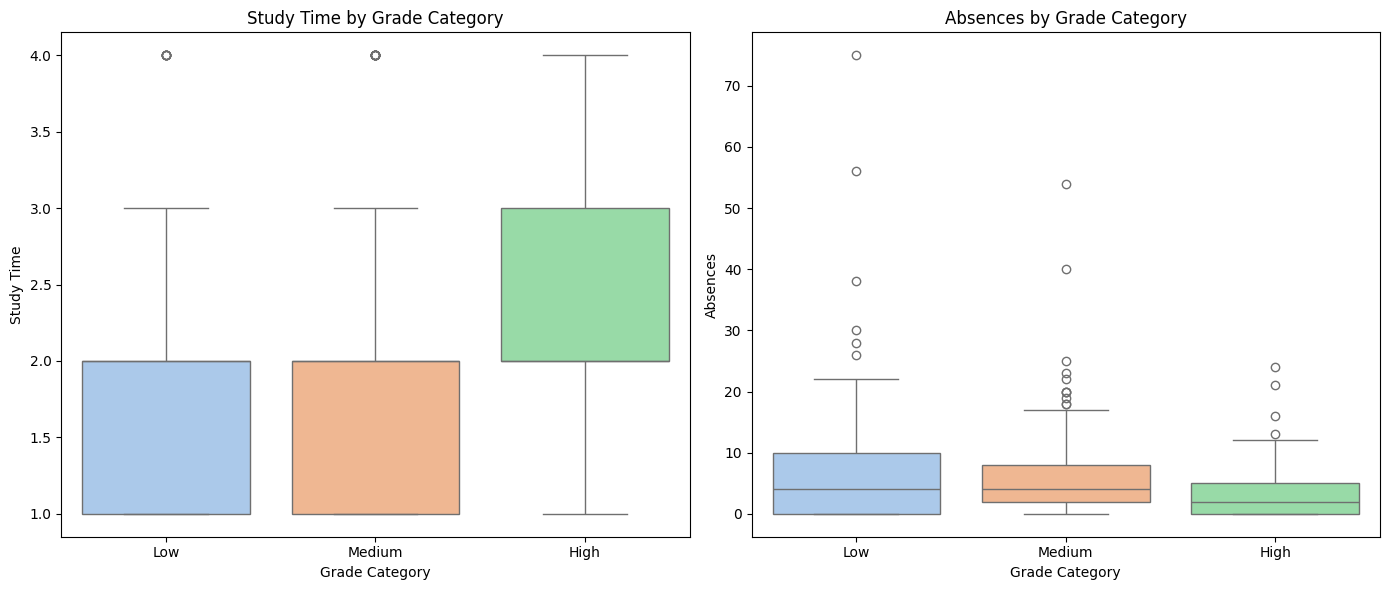

In [12]:
# === Section 4: Study Time and Absences ===
# Boxplots for study time and absences by grade category

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for study time by grade category
sns.boxplot(
    x='Grade_Category', 
    y='studytime', 
    data=data, 
    hue='Grade_Category',  # Explicitly assign the x variable to hue
    palette="pastel", 
    ax=axes[0], 
    dodge=False,  # Prevent splitting of boxes
    legend=False  # Suppress redundant legend
)
axes[0].set_title("Study Time by Grade Category")
axes[0].set_xlabel("Grade Category")
axes[0].set_ylabel("Study Time")

# Boxplot for absences by grade category
sns.boxplot(
    x='Grade_Category', 
    y='absences', 
    data=data, 
    hue='Grade_Category',  # Explicitly assign the x variable to hue
    palette="pastel", 
    ax=axes[1], 
    dodge=False,  # Prevent splitting of boxes
    legend=False  # Suppress redundant legend
)
axes[1].set_title("Absences by Grade Category")
axes[1].set_xlabel("Grade Category")
axes[1].set_ylabel("Absences")

# Adjust layout
plt.tight_layout()
plt.show()

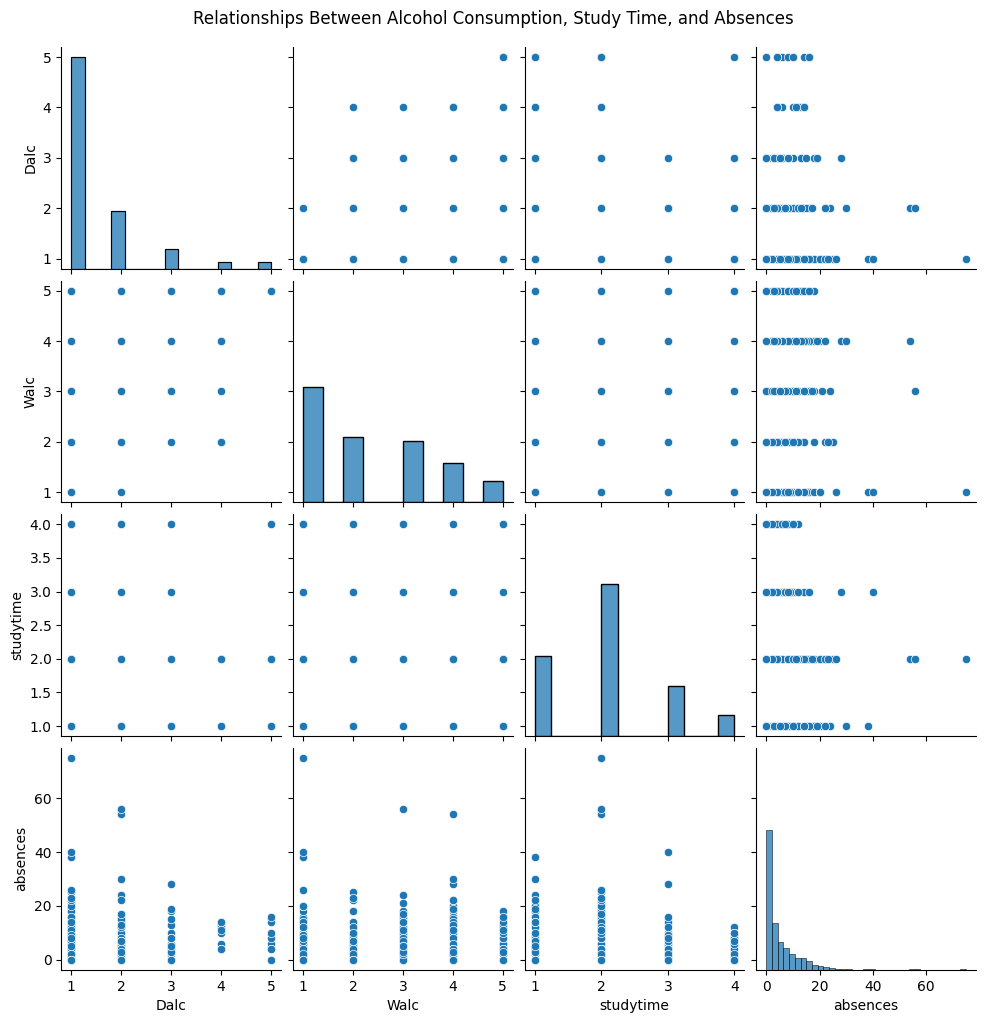

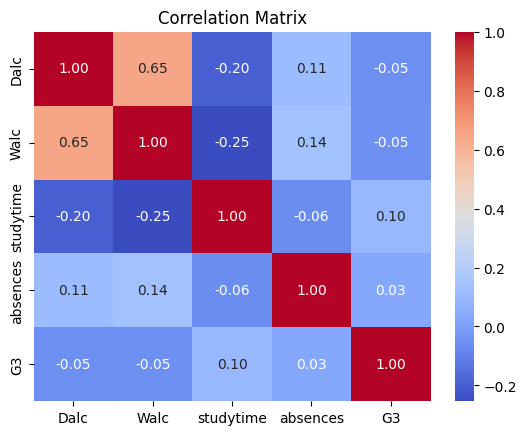

In [13]:
# === Section 5: Correlation and Pairwise Relationships ===
sns.pairplot(data[['Dalc', 'Walc', 'studytime', 'absences']])
plt.suptitle("Relationships Between Alcohol Consumption, Study Time, and Absences", y=1.02)
plt.show()

correlation_matrix = data[['Dalc', 'Walc', 'studytime', 'absences', 'G3']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
# === Section 6: Statistical Analysis ===
#Pearson Correlation
# Correlation between weekday alcohol consumption and grades
dalc_corr, dalc_pval = pearsonr(data['Dalc'], data['G3'])

# Correlation between weekend alcohol consumption and grades
walc_corr, walc_pval = pearsonr(data['Walc'], data['G3'])
print(f"Weekday Alcohol vs. Grades: Correlation = {dalc_corr:.2f}, P-value = {dalc_pval:.4f}")
print(f"Weekend Alcohol vs. Grades: Correlation = {walc_corr:.2f}, P-value = {walc_pval:.4f}")


Weekday Alcohol vs. Grades: Correlation = -0.05, P-value = 0.2785
Weekend Alcohol vs. Grades: Correlation = -0.05, P-value = 0.3032


In [15]:
# T-test to compare weekday and weekend alcohol consumption
t_stat, p_value = ttest_rel(data['Dalc'], data['Walc'])
print(f"\nT-test results:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.2e}")


T-test results:
T-statistic: -16.38, P-value: 2.34e-46


In [16]:
# === Section 7-0 : Prepare Data for Modeling ===
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder

# Prepare predictors and target
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
data['Grade_Category_Ordinal'] = ordinal_encoder.fit_transform(data[['Grade_Category']])

X = data[['Dalc', 'Walc', 'studytime', 'absences']]
y = data['Grade_Category_Ordinal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after resampling
print("\nResampled Class Distribution in Training Set:")
print(pd.Series(y_train_resampled).value_counts())



Resampled Class Distribution in Training Set:
Grade_Category_Ordinal
1.0    144
0.0    144
2.0    144
Name: count, dtype: int64



Classification Report:
              precision    recall  f1-score   support

         Low       0.36      0.28      0.32        46
      Medium       0.31      0.10      0.16        48
        High       0.22      0.60      0.33        25

    accuracy                           0.28       119
   macro avg       0.30      0.33      0.27       119
weighted avg       0.31      0.28      0.25       119



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


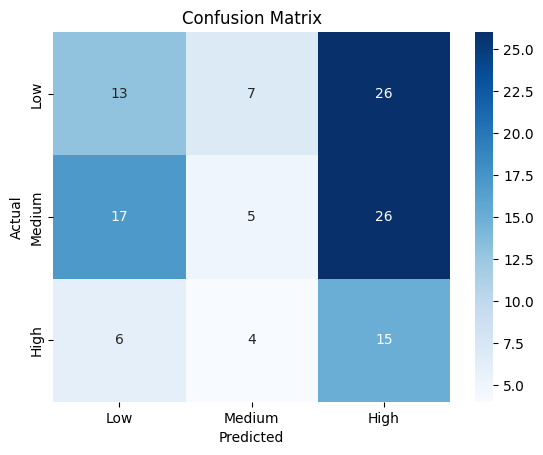

ROC-AUC Score: 0.58


In [27]:
# === Section 7: multiclass logistic regression Analysis ===
# Prepare predictors and target
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
data['Grade_Category_Ordinal'] = ordinal_encoder.fit_transform(data[['Grade_Category']])

X = data[['Dalc', 'Walc', 'studytime', 'absences']]
y = data['Grade_Category_Ordinal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='lbfgs', class_weight='balanced', max_iter=200)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=ordinal_encoder.categories_[0]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=ordinal_encoder.categories_[0], yticklabels=ordinal_encoder.categories_[0])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Analysis
y_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f"ROC-AUC Score: {roc_auc:.2f}")

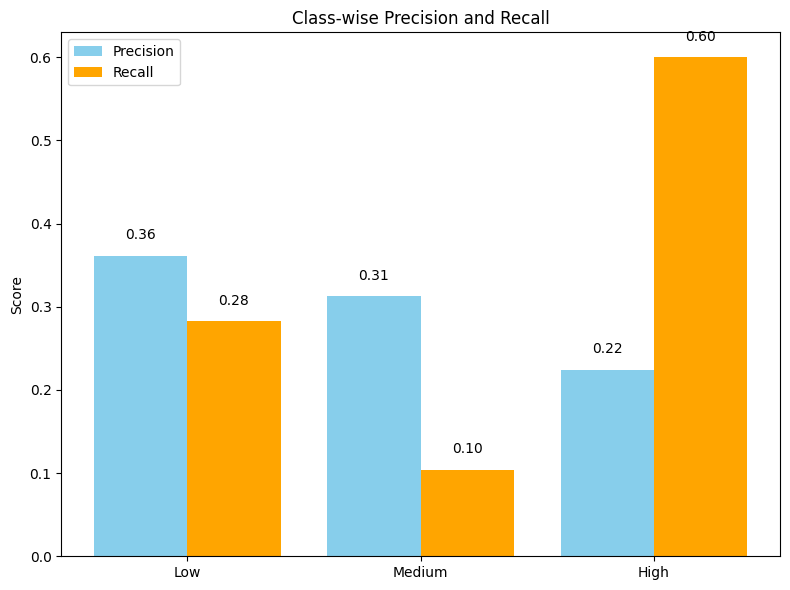

In [28]:
# Bar Chart for Precision and Recall
from sklearn.metrics import precision_score, recall_score

# Calculate class-wise precision and recall
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Create the bar chart
categories = ordinal_encoder.categories_[0]
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - 0.2, precision, 0.4, label='Precision', color='skyblue')
bar2 = ax.bar(x + 0.2, recall, 0.4, label='Recall', color='orange')

# Add text for each bar
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', fontsize=10)

# Customizing the chart
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Score')
ax.set_title('Class-wise Precision and Recall')
ax.legend()
plt.tight_layout()
plt.show()


Optimization terminated successfully.
         Current function value: 1.001776
         Iterations 7

Multinomial Logistic Regression Summary:
                            MNLogit Regression Results                            
Dep. Variable:     Grade_Category_Ordinal   No. Observations:                  395
Model:                            MNLogit   Df Residuals:                      385
Method:                               MLE   Df Model:                            8
Date:                    Sun, 01 Dec 2024   Pseudo R-squ.:                 0.02594
Time:                            16:56:40   Log-Likelihood:                -395.70
converged:                           True   LL-Null:                       -406.24
Covariance Type:                nonrobust   LLR p-value:                  0.006957
Grade_Category_Ordinal=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const 

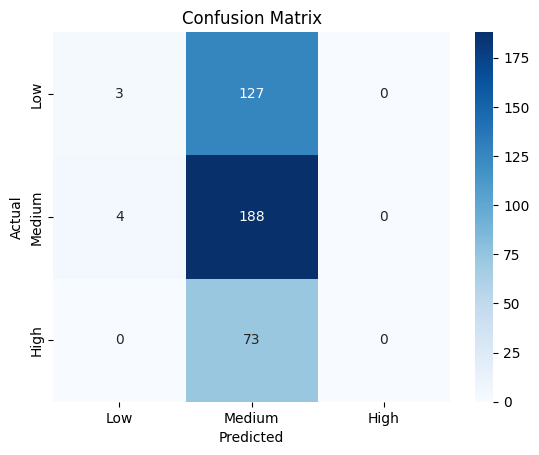

Accuracy (Multinomial Logistic Regression): 0.48
Pseudo R-Squared (Multinomial Logistic Regression): 0.02594

Odds Ratios (Multinomial Logistic Regression):
                  0         1
const      1.032645  1.066006
Dalc       0.927957  0.587187
Walc       1.109450  0.965543
studytime  1.170728  1.239982
absences   0.986067  0.941400
Significant Predictors (Multinomial Logistic Regression): ['const', 'Dalc', 'Walc', 'studytime', 'absences']


In [18]:
from sklearn.metrics import accuracy_score

# === Section 8: Multinomial Logistic Regression with Statsmodels ===
X_sm = sm.add_constant(X)
mnlogit_model = sm.MNLogit(data['Grade_Category_Ordinal'], X_sm)
mnlogit_result = mnlogit_model.fit()
print("\nMultinomial Logistic Regression Summary:")
print(mnlogit_result.summary())

# Coefficients with Odds Ratios
odds_ratios = np.exp(mnlogit_result.params)
print("\nOdds Ratios (Multinomial Logistic Regression):")
print(odds_ratios)

# Predictions and Model Evaluation
predictions = mnlogit_result.predict(X_sm)  # Predicted probabilities

# Convert predictions DataFrame to NumPy array and get the class with the highest probability
y_pred = predictions.values.argmax(axis=1)  # Choosing the class with highest probability

# Confusion Matrix and Accuracy
cm = confusion_matrix(data['Grade_Category_Ordinal'], y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=ordinal_encoder.categories_[0], yticklabels=ordinal_encoder.categories_[0])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_pred_mnlogit = predictions.values.argmax(axis=1)  # Use already computed predictions
accuracy_mnlogit = accuracy_score(data['Grade_Category_Ordinal'], y_pred_mnlogit)
print(f"Accuracy (Multinomial Logistic Regression): {accuracy_mnlogit:.2f}")

#categories = ['Low', 'Medium', 'High']
#print("\nClassification Report (Multinomial Logistic Regression):")
#print(classification_report(data['Grade_Category_Ordinal'], y_pred_mnlogit, target_names=categories))

print(f"Pseudo R-Squared (Multinomial Logistic Regression): {mnlogit_result.prsquared:.5f}")

print("\nOdds Ratios (Multinomial Logistic Regression):")
print(odds_ratios)

significant_predictors_mnlogit = mnlogit_result.pvalues[mnlogit_result.pvalues < 0.05].index
print(f"Significant Predictors (Multinomial Logistic Regression): {significant_predictors_mnlogit.tolist()}")



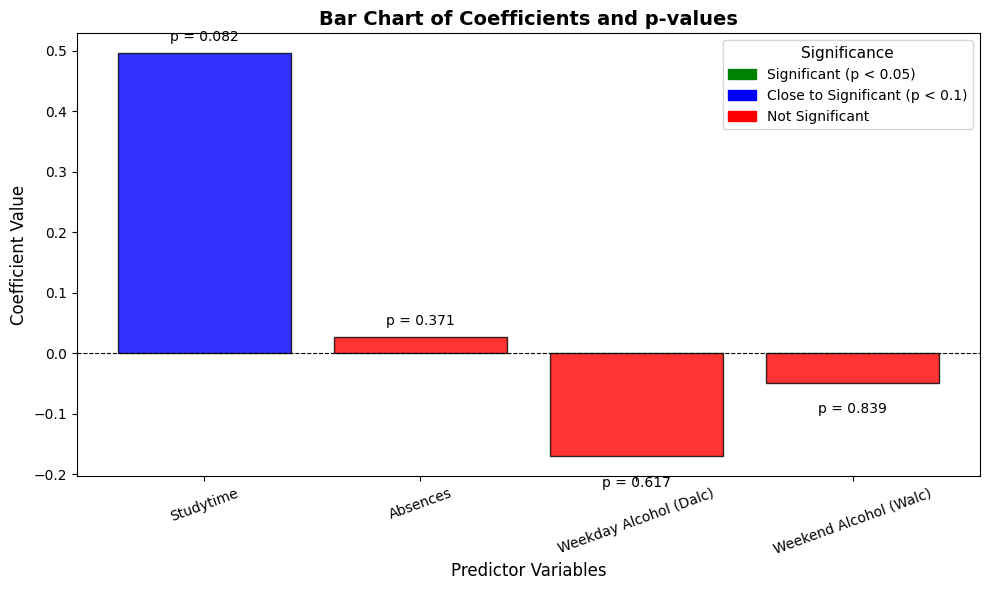

In [19]:

# Data
predictors = ['Studytime', 'Absences', 'Weekday Alcohol (Dalc)', 'Weekend Alcohol (Walc)']
coefficients = [0.4952, 0.0260, -0.1703, -0.0487]
p_values = [0.082, 0.371, 0.617, 0.839]

# Bar colors based on significance
colors = []
for p in p_values:
    if p < 0.05:
        colors.append('green')  # Significant
    elif p < 0.1:
        colors.append('blue')  # Close to significant
    else:
        colors.append('red')  # Not significant

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(predictors, coefficients, color=colors, edgecolor='black', alpha=0.8)

# Add p-values as text above bars
for bar, coef, p in zip(bars, coefficients, p_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02 if height >= 0 else height - 0.05,
            f'p = {p:.3f}', ha='center', fontsize=10, color='black')

# Horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Labels and title
ax.set_xlabel('Predictor Variables', fontsize=12)
ax.set_ylabel('Coefficient Value', fontsize=12)
ax.set_title('Bar Chart of Coefficients and p-values', fontsize=14, weight='bold')
ax.set_xticks(np.arange(len(predictors)))
ax.set_xticklabels(predictors, fontsize=10, rotation=20)

# Legend
legend_labels = {'green': 'Significant (p < 0.05)', 'blue': 'Close to Significant (p < 0.1)', 'red': 'Not Significant'}
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_labels.keys()]
ax.legend(handles, legend_labels.values(), title="Significance", fontsize=10, title_fontsize=11, loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


/var/folders/6s/q6l1fn613nxf6wbl_fcl49sh0000gp/T/ipykernel_1036/2921605418.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(odds_ratios.index, rotation=20, ha='right')


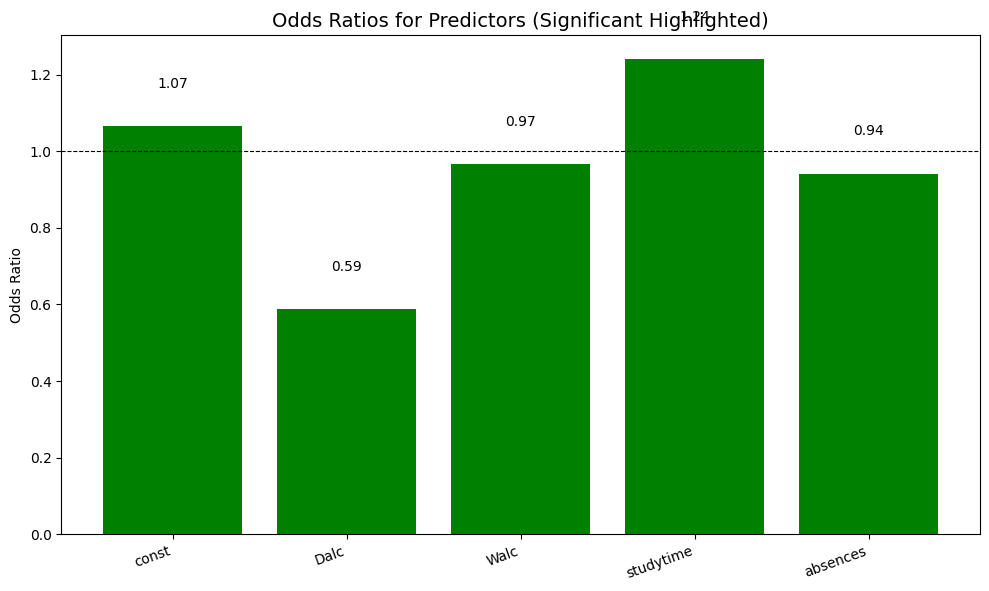

In [25]:
# Bar Chart for Odds Ratios with Significant Predictors Highlighted
odds_ratios_mnlogit = odds_ratios[1]  # Extract odds ratios for one category
significant = odds_ratios.index.isin(significant_predictors_mnlogit)

# Highlight significant predictors
colors = ['green' if sig else 'red' for sig in significant]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(odds_ratios.index, odds_ratios_mnlogit, color=colors)

# Add p-values as text
for bar, odds in zip(bars, odds_ratios_mnlogit):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{odds:.2f}', ha='center', fontsize=10)

# Chart customization
ax.axhline(1, color='black', linestyle='--', linewidth=0.8)
ax.set_xticklabels(odds_ratios.index, rotation=20, ha='right')
ax.set_title('Odds Ratios for Predictors (Significant Highlighted)', fontsize=14)
ax.set_ylabel('Odds Ratio')
plt.tight_layout()
plt.show()


In [20]:
# === Section 9: Ordinal Logistic Regression ===
# Fit the ordinal logistic regression model (without adding a constant)
ordinal_model = OrderedModel(data['Grade_Category'], X, distr='logit')
ordinal_result = ordinal_model.fit(method='bfgs')

# Display model summary
print("\nOrdinal Logistic Regression Summary:")
print(ordinal_result.summary())

# Odds Ratios (Ordinal Logistic Regression)
odds_ratios_ord = np.exp(ordinal_result.params)
print("\nOdds Ratios (Ordinal Logistic Regression):")
print(odds_ratios_ord)

# Predictions and visualizing the predicted probabilities
predictions = ordinal_result.predict(X)

y_pred_ordinal = predictions.idxmax(axis=1).astype('category').cat.codes
accuracy_ordinal = accuracy_score(data['Grade_Category_Ordinal'], y_pred_ordinal)
print(f"Accuracy (Ordinal Logistic Regression): {accuracy_ordinal:.2f}")

print("\nOdds Ratios (Ordinal Logistic Regression):")
print(odds_ratios_ord)

#print("\nClassification Report (Ordinal Logistic Regression):")
#print(classification_report(data['Grade_Category_Ordinal'], y_pred_ordinal, target_names=categories))

log_likelihood_null = ordinal_result.llnull
log_likelihood_full = ordinal_result.llf
pseudo_r_squared_ordinal = 1 - (log_likelihood_full / log_likelihood_null)
print(f"Pseudo R-Squared (Ordinal Logistic Regression): {pseudo_r_squared_ordinal:.5f}")

# Significant Predictors for Ordinal Logistic Regression
significant_predictors_ordinal = ordinal_result.pvalues[ordinal_result.pvalues < 0.05].index
print(f"Significant Predictors (Ordinal Logistic Regression): {significant_predictors_ordinal.tolist()}")




Optimization terminated successfully.
         Current function value: 1.012783
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20

Ordinal Logistic Regression Summary:
                             OrderedModel Results                             
Dep. Variable:         Grade_Category   Log-Likelihood:                -400.05
Model:                   OrderedModel   AIC:                             812.1
Method:            Maximum Likelihood   BIC:                             836.0
Date:                Sun, 01 Dec 2024                                         
Time:                        16:56:41                                         
No. Observations:                 395                                         
Df Residuals:                     389                                         
Df Model:                           4                                         
                  coef    std err          z      P>|z|      [0.025      0.975]

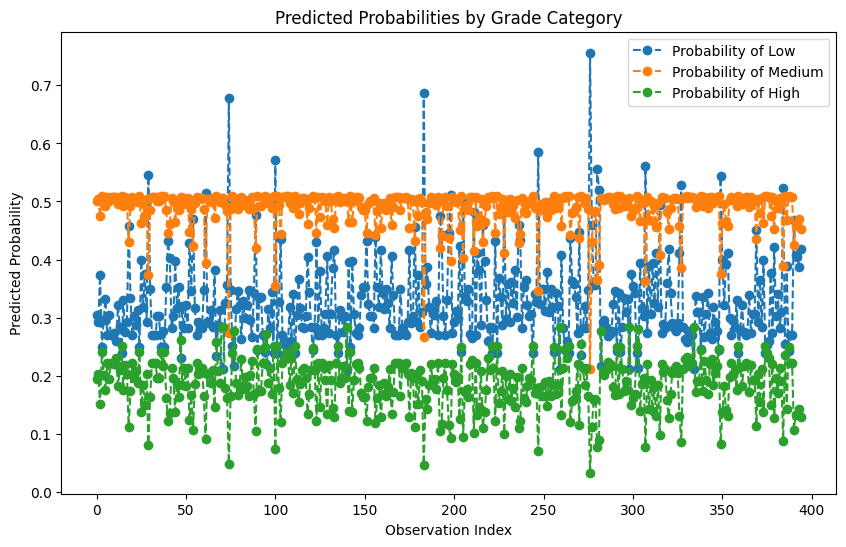

In [21]:
# Visualize predicted probabilities
plt.figure(figsize=(10, 6))
categories = ['Low', 'Medium', 'High']
predictions_array = predictions.to_numpy()

# Loop through the categories and plot the probabilities
for i, category in enumerate(categories):
    plt.plot(predictions_array[:, i], label=f"Probability of {category}", linestyle='--', marker='o')

plt.title("Predicted Probabilities by Grade Category")
plt.xlabel("Observation Index")
plt.ylabel("Predicted Probability")
plt.legend()
plt.show()